# Virat Kohli - ODI Analysis

In [32]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder , OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRFRegressor , XGBRegressor
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

### Importing Clean Data

In [33]:
# df = pd.read_excel('ViratKohli-ODI.xlsx')
df = pd.read_excel('ODI-Clean.xlsx')

In [34]:
df.head()

,Match,Innings,Date,M/Inns,Posn,Versus,Ground,How Dismissed,Runs,B/F,S/R,Progressive-Runs,Progressive-B/F,Progressive-Avg,Progressive-S/R,Captain,Dismissal Type
0,1,1.0,2008-08-18,1st,2,Sri Lanka,Rangiri Dambulla International Stadium,lbw b K M D N Kulasekara,12,22,54.55,12,22,12.00,54.55,No,LBW
1,2,2.0,2008-08-20,2nd,2,Sri Lanka,Rangiri Dambulla International Stadium,c C K Kapugedera b T Thushara,37,67,55.22,49,89,24.50,55.06,No,Caught
2,3,3.0,2008-08-24,1st,1,Sri Lanka,R Premadasa Stadium,run out,25,38,65.79,74,127,24.67,58.27,No,Run Out
3,4,4.0,2008-08-27,1st,1,Sri Lanka,R Premadasa Stadium,b T Thushara,54,66,81.82,128,193,32.00,66.32,No,Bowled
4,5,5.0,2008-08-29,2nd,1,Sri Lanka,R Premadasa Stadium,lbw b K M D N Kulasekara,31,46,67.39,159,239,31.80,66.53,No,LBW


### Data information and Description

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Match             308 non-null    object        
 1   Innings           296 non-null    float64       
 2   Date              308 non-null    datetime64[ns]
 3   M/Inns            308 non-null    object        
 4   Posn              308 non-null    int64         
 5   Versus            308 non-null    object        
 6   Ground            308 non-null    object        
 7   How Dismissed     308 non-null    object        
 8   Runs              308 non-null    int64         
 9   B/F               308 non-null    int64         
 10  S/R               308 non-null    float64       
 11  Progressive-Runs  308 non-null    int64         
 12  Progressive-B/F   308 non-null    int64         
 13  Progressive-Avg   308 non-null    float64       
 14  Progressive-S/R   308 non-

In [36]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Innings,296.0,148.500000,85.592056,1.00,74.7500,148.50,222.2500,296.00
Posn,308.0,3.061688,0.909286,0.00,3.0000,3.00,3.0000,7.00
Runs,308.0,47.262987,43.310924,0.00,8.7500,34.00,80.2500,183.00
B/F,308.0,50.464286,39.894919,0.00,13.0000,43.00,83.0000,159.00
S/R,308.0,77.269286,39.081306,0.00,59.9050,80.95,100.0000,209.09
Progressive-Runs,308.0,6910.480519,4375.897862,12.00,2997.2500,6473.00,11105.0000,14557.00
Progressive-B/F,308.0,7578.116883,4596.356583,22.00,3581.7500,7195.00,11923.5000,15543.00
Progressive-Avg,308.0,52.078214,6.768001,12.00,49.1650,52.17,57.8175,60.31
Progressive-S/R,308.0,87.948377,6.428469,54.55,83.9075,89.91,92.9300,93.85


### Null Values

In [24]:
df.isnull().sum()

Match                0
Innings             12
Date                 0
M/Inns               0
Posn                 0
Versus               0
Ground               0
How Dismissed        0
Runs                 0
B/F                  0
S/R                  0
Progressive-Runs     0
Progressive-B/F      0
Progressive-Avg      0
Progressive-S/R      0
Captain              0
Dismissal Type       0
dtype: int64

### Nulls in "Innings" indicate that we have a result for the match but Virat Kohli did not bat. 

In [37]:
df.shape

(308, 17)

### Mapping Grounds to State and Country
Used Chatgpt to get the geographical information of the grounds. 

In [38]:
grounds = pd.read_csv('Grounds.csv')

In [39]:
df = pd.merge(df,grounds,on='Ground' , how='left')

In [40]:
df.head()

,Match,Innings,Date,M/Inns,Posn,Versus,Ground,How Dismissed,Runs,B/F,S/R,Progressive-Runs,Progressive-B/F,Progressive-Avg,Progressive-S/R,Captain,Dismissal Type,City,State/Province,Country,ICC Region,Latitude,longitude
0,1,1.0,2008-08-18,1st,2,Sri Lanka,Rangiri Dambulla International Stadium,lbw b K M D N Kulasekara,12,22,54.55,12,22,12.00,54.55,No,LBW,Dambulla,Central Province,Sri Lanka,Asia,7.8600,80.6736
1,2,2.0,2008-08-20,2nd,2,Sri Lanka,Rangiri Dambulla International Stadium,c C K Kapugedera b T Thushara,37,67,55.22,49,89,24.50,55.06,No,Caught,Dambulla,Central Province,Sri Lanka,Asia,7.8600,80.6736
2,3,3.0,2008-08-24,1st,1,Sri Lanka,R Premadasa Stadium,run out,25,38,65.79,74,127,24.67,58.27,No,Run Out,Colombo,Western Province,Sri Lanka,Asia,6.9322,79.8726
3,4,4.0,2008-08-27,1st,1,Sri Lanka,R Premadasa Stadium,b T Thushara,54,66,81.82,128,193,32.00,66.32,No,Bowled,Colombo,Western Province,Sri Lanka,Asia,6.9322,79.8726
4,5,5.0,2008-08-29,2nd,1,Sri Lanka,R Premadasa Stadium,lbw b K M D N Kulasekara,31,46,67.39,159,239,31.80,66.53,No,LBW,Colombo,Western Province,Sri Lanka,Asia,6.9322,79.8726


In [29]:
df.isnull().sum()

Match                0
Innings             12
Date                 0
M/Inns               0
Posn                 0
Versus               0
Ground               0
How Dismissed        0
Runs                 0
B/F                  0
S/R                  0
Progressive-Runs     0
Progressive-B/F      0
Progressive-Avg      0
Progressive-S/R      0
Captain              0
Dismissal Type       0
City                 0
State/Province      13
Country              0
ICC Region           0
Latitude             0
longitude            0
dtype: int64

In [31]:
# df[df['State/Province'].isna()]

In [41]:
# grounds.head()

### Analysis

### Heat Map

<AxesSubplot:>

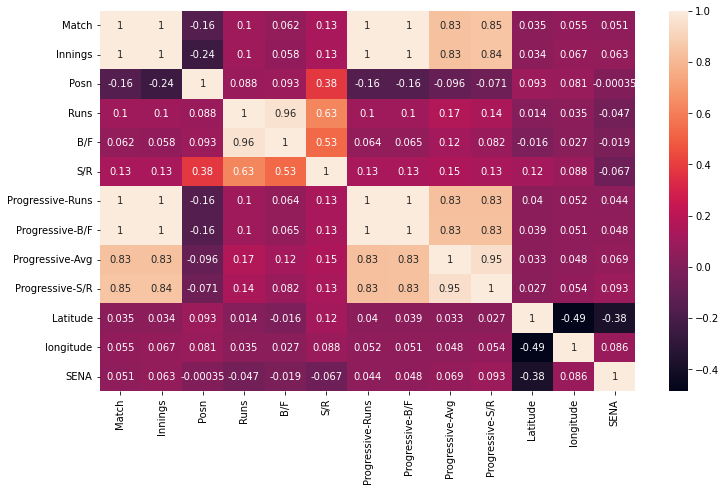

In [71]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)

### Scores against each oppositions

In [53]:
df.groupby('Versus')['Runs'].agg(['mean','count']).sort_values(by = 'mean',ascending=False).reset_index()

,Versus,mean,count
0,Bangladesh,54.823529,17
1,South Africa,53.117647,34
2,West Indies,52.581395,43
3,New Zealand,50.212121,33
4,Australia,47.641509,53
5,Sri Lanka,47.357143,56
6,Pakistan,45.764706,17
7,Afghanistan,40.666667,3
8,Ireland,39.000000,2
9,England,36.763158,38


### Average Scores M/Innings

In [54]:
df.groupby('M/Inns')['Runs'].agg(['mean','count']).sort_values(by = 'count',ascending=False).reset_index()

,M/Inns,mean,count
0,2nd,48.538462,169
1,1st,47.066667,135
2,N/A - No Result,0.000000,4


### Mean scores at each batting positions

In [55]:
df.groupby('Posn')['Runs'].agg(['mean','count']).sort_values(by = 'count',ascending=False).reset_index()

,Posn,mean,count
0,3,51.601660,241
1,4,45.307692,39
2,0,0.000000,12
3,1,28.750000,4
4,5,31.750000,4
5,7,9.500000,4
6,2,17.000000,3
7,6,23.000000,1


### How was he dismissed mostly? 

Caught         176
Not Out         47
Bowled          34
LBW             21
Run Out         12
Did Not Bat     12
Stumped          5
Hit Wicket       1
Name: Dismissal Type, dtype: int64


C:\Users\Sharan Kalyan\Anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


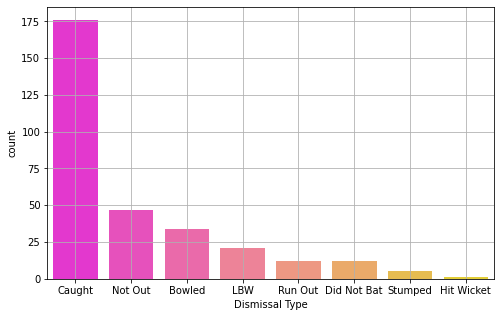

In [56]:
plt.figure(figsize=(8,5))
sns.countplot(df['Dismissal Type'],order = df['Dismissal Type'].value_counts().index,palette='spring')
plt.grid()
print(df['Dismissal Type'].value_counts())
plt.show()

### Does captaincy bring the best out of Virat? 

In [57]:
df.groupby('Captain')['Runs'].agg(['mean','count']).sort_values(by = 'count',ascending=False).reset_index()

,Captain,mean,count
0,No,42.760563,213
1,Yes,57.357895,95


### Mean Scores by Country

In [58]:
df.groupby('Country')['Runs'].agg(['mean','count']).sort_values(by = 'mean',ascending=False).reset_index()

,Country,mean,count
0,Trinidad and Tobago,63.444444,9
1,Bangladesh,57.736842,19
2,Jamaica,54.500000,4
3,India,52.595238,126
4,South Africa,49.650000,20
5,Wales,49.000000,4
6,New Zealand,45.846154,13
7,Australia,43.781250,32
8,UAE,43.600000,5
9,Zimbabwe,40.555556,9


### Mean Scores in SENA Countries

In [59]:
sena = []
for i in df['Country']:
    if i in ('South Africa', 'England', 'Wales','New Zealand', 'Australia'):
        sena.append(1)
    else:
        sena.append(0)
df['SENA'] = sena

In [60]:
df.groupby(['SENA'])['Runs'].agg(['mean','count']).sort_values(by = 'mean',ascending=False).reset_index()

,SENA,mean,count
0,0,48.657143,210
1,1,44.275510,98


### SENA Captaincy 

In [61]:
df.groupby(['Captain','SENA'])['Runs'].agg(['mean','count']).sort_values(by = 'mean',ascending=False).reset_index()

,Captain,SENA,mean,count
0,Yes,0,57.500000,60
1,Yes,1,57.114286,35
2,No,0,45.120000,150
3,No,1,37.142857,63


### Cleaning Match 

In [65]:
match = []
for i in df['Match']:
    match.append(i.split('(')[0])
df['Match'] = match

In [69]:
df['Match'] = df['Match'].astype('int64')

### Machine Learning

In [98]:
ml = df.copy()

In [99]:
ml.head()

,Match,Innings,Date,M/Inns,Posn,Versus,Ground,How Dismissed,Runs,B/F,S/R,Progressive-Runs,Progressive-B/F,Progressive-Avg,Progressive-S/R,Captain,Dismissal Type,City,State/Province,Country,ICC Region,Latitude,longitude,SENA
0,1,1.0,2008-08-18,1st,2,Sri Lanka,Rangiri Dambulla International Stadium,lbw b K M D N Kulasekara,12,22,54.55,12,22,12.00,54.55,No,LBW,Dambulla,Central Province,Sri Lanka,Asia,7.8600,80.6736,0
1,2,2.0,2008-08-20,2nd,2,Sri Lanka,Rangiri Dambulla International Stadium,c C K Kapugedera b T Thushara,37,67,55.22,49,89,24.50,55.06,No,Caught,Dambulla,Central Province,Sri Lanka,Asia,7.8600,80.6736,0
2,3,3.0,2008-08-24,1st,1,Sri Lanka,R Premadasa Stadium,run out,25,38,65.79,74,127,24.67,58.27,No,Run Out,Colombo,Western Province,Sri Lanka,Asia,6.9322,79.8726,0
3,4,4.0,2008-08-27,1st,1,Sri Lanka,R Premadasa Stadium,b T Thushara,54,66,81.82,128,193,32.00,66.32,No,Bowled,Colombo,Western Province,Sri Lanka,Asia,6.9322,79.8726,0
4,5,5.0,2008-08-29,2nd,1,Sri Lanka,R Premadasa Stadium,lbw b K M D N Kulasekara,31,46,67.39,159,239,31.80,66.53,No,LBW,Colombo,Western Province,Sri Lanka,Asia,6.9322,79.8726,0


In [100]:
ml = ml[['Match','Date','M/Inns','Versus','Country','SENA','Captain','Runs']]

In [101]:
ml.head()

,Match,Date,M/Inns,Versus,Country,SENA,Captain,Runs
0,1,2008-08-18,1st,Sri Lanka,Sri Lanka,0,No,12
1,2,2008-08-20,2nd,Sri Lanka,Sri Lanka,0,No,37
2,3,2008-08-24,1st,Sri Lanka,Sri Lanka,0,No,25
3,4,2008-08-27,1st,Sri Lanka,Sri Lanka,0,No,54
4,5,2008-08-29,2nd,Sri Lanka,Sri Lanka,0,No,31


In [116]:
ml['Country'].fillna('India',axis=0,inplace=True)

In [102]:
ml['Date'] = pd.to_datetime(ml['Date'])

In [103]:
ml['Month'] = ml['Date'].dt.month

In [104]:
ml['Year'] = ml['Date'].dt.year

In [105]:
ml.drop('Date',inplace=True,axis=1)

### Preprocessing

In [106]:
ml['M/Inns'] = ml['M/Inns'].map({'1st':1, '2nd':2,'N/A - No Result':0})

In [107]:
ml['M/Inns'].value_counts()

2    169
1    135
0      4
Name: M/Inns, dtype: int64

In [110]:
ml['Captain'] = ml['Captain'].map({'Yes':1,'No':0})

In [113]:
le_versus = LabelEncoder()
le_country = LabelEncoder()

In [118]:
ml['Versus'] = le_versus.fit_transform(ml['Versus'])
ml['Country'] = le_country.fit_transform(ml['Country'])

In [119]:
ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308 entries, 0 to 307
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Match    308 non-null    int64
 1   M/Inns   308 non-null    int64
 2   Versus   308 non-null    int32
 3   Country  308 non-null    int32
 4   SENA     308 non-null    int64
 5   Captain  308 non-null    int64
 6   Runs     308 non-null    int64
 7   Month    308 non-null    int64
 8   Year     308 non-null    int64
dtypes: int32(2), int64(7)
memory usage: 29.8 KB


In [121]:
ml.head()

,Match,M/Inns,Versus,Country,SENA,Captain,Runs,Month,Year
0,1,1,10,10,0,0,12,8,2008
1,2,2,10,10,0,0,37,8,2008
2,3,1,10,10,0,0,25,8,2008
3,4,1,10,10,0,0,54,8,2008
4,5,2,10,10,0,0,31,8,2008


In [123]:
x = ml.drop('Runs',axis=1)
y = ml[['Runs']]

In [124]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.05,random_state=42)

In [129]:
lr = LinearRegression()
kn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
ada = AdaBoostRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()
xgbrf = XGBRFRegressor()
cb = CatBoostRegressor()
lgb = LGBMRegressor()

In [128]:
lr.fit(xtrain,ytrain)
lr_preds = lr.predict(xtest)
lr_r2 = r2_score(ytest,lr_preds)
lr_mae = mean_absolute_error(ytest,lr_preds)
lr_mse = mean_squared_error(ytest,lr_preds)
lr_rmse = np.sqrt(lr_mse)

print('r2 Score: ',lr_r2)
print('MAE: ',lr_mae)
print('RMSE: ',lr_rmse)

r2 Score:  -0.08849712564498402
MAE:  35.66718916517425
RMSE:  42.95963068700058


### Decision Tree

In [130]:
dt.fit(xtrain,ytrain)
dt_preds = dt.predict(xtest)
dt_r2 = r2_score(ytest,dt_preds)
dt_mae = mean_absolute_error(ytest,dt_preds)
dt_mse = mean_squared_error(ytest,dt_preds)
dt_rmse = np.sqrt(dt_mse)

print('r2 Score: ',dt_r2)
print('MAE: ',dt_mae)
print('RMSE: ',dt_rmse)

r2 Score:  -0.17993567472422156
MAE:  37.8125
RMSE:  44.727648049053506


### KNN

In [132]:
kn.fit(xtrain,ytrain)
kn_preds = kn.predict(xtest)
kn_r2 = r2_score(ytest,kn_preds)
kn_mae = mean_absolute_error(ytest,kn_preds)
kn_mse = mean_squared_error(ytest,kn_preds)
kn_rmse = np.sqrt(kn_mse)

print('r2 Score: ',kn_r2)
print('MAE: ',kn_mae)
print('RMSE: ',kn_rmse)

r2 Score:  0.14659785643851786
MAE:  32.8
RMSE:  38.03853309474486


C:\Users\Sharan Kalyan\Anaconda3\envs\py38\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


### Random Forest

In [133]:
rf.fit(xtrain,ytrain)
rf_preds = rf.predict(xtest)
rf_r2 = r2_score(ytest,rf_preds)
rf_mae = mean_absolute_error(ytest,rf_preds)
rf_mse = mean_squared_error(ytest,rf_preds)
rf_rmse = np.sqrt(rf_mse)

print('r2 Score: ',rf_r2)
print('MAE: ',rf_mae)
print('RMSE: ',rf_rmse)

r2 Score:  0.11931586290790797
MAE:  33.765625
RMSE:  38.64176747704484


C:\Users\Sharan Kalyan\AppData\Local\Temp\ipykernel_26380\647020646.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtrain,ytrain)


### Gradient Boosting

In [134]:
gb.fit(xtrain,ytrain)
gb_preds = gb.predict(xtest)
gb_r2 = r2_score(ytest,gb_preds)
gb_mae = mean_absolute_error(ytest,gb_preds)
gb_mse = mean_squared_error(ytest,gb_preds)
gb_rmse = np.sqrt(gb_mse)

print('r2 Score: ',gb_r2)
print('MAE: ',gb_mae)
print('RMSE: ',gb_rmse)

r2 Score:  0.12846742308522385
MAE:  32.227704020584476
RMSE:  38.44047172528569


C:\Users\Sharan Kalyan\Anaconda3\envs\py38\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Adaboost

In [135]:
ada.fit(xtrain,ytrain)
ada_preds = ada.predict(xtest)
ada_r2 = r2_score(ytest,ada_preds)
ada_mae = mean_absolute_error(ytest,ada_preds)
ada_mse = mean_squared_error(ytest,ada_preds)
ada_rmse = np.sqrt(ada_mse)

print('r2 Score: ',ada_r2)
print('MAE: ',ada_mae)
print('RMSE: ',ada_rmse)

r2 Score:  0.1567966448631971
MAE:  34.06377531392586
RMSE:  37.81055558414906


C:\Users\Sharan Kalyan\Anaconda3\envs\py38\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Catboost

In [136]:
cb.fit(xtrain,ytrain)
cb_preds = cb.predict(xtest)
cb_r2 = r2_score(ytest,cb_preds)
cb_mae = mean_absolute_error(ytest,cb_preds)
cb_mse = mean_squared_error(ytest,cb_preds)
cb_rmse = np.sqrt(cb_mse)

print('r2 Score: ',cb_r2)
print('MAE: ',cb_mae)
print('RMSE: ',cb_rmse)

Learning rate set to 0.033706
0:	learn: 43.1782937	total: 180ms	remaining: 2m 59s
1:	learn: 43.0659361	total: 181ms	remaining: 1m 30s
2:	learn: 42.9535446	total: 182ms	remaining: 1m
3:	learn: 42.8748964	total: 183ms	remaining: 45.6s
4:	learn: 42.8330009	total: 184ms	remaining: 36.7s
5:	learn: 42.7330121	total: 186ms	remaining: 30.8s
6:	learn: 42.5981222	total: 187ms	remaining: 26.5s
7:	learn: 42.5006813	total: 188ms	remaining: 23.3s
8:	learn: 42.3835583	total: 189ms	remaining: 20.8s
9:	learn: 42.2342649	total: 190ms	remaining: 18.8s
10:	learn: 42.1184966	total: 191ms	remaining: 17.2s
11:	learn: 42.0954270	total: 195ms	remaining: 16s
12:	learn: 41.9966284	total: 197ms	remaining: 15s
13:	learn: 41.9115759	total: 198ms	remaining: 13.9s
14:	learn: 41.8200711	total: 199ms	remaining: 13.1s
15:	learn: 41.7348431	total: 200ms	remaining: 12.3s
16:	learn: 41.6278381	total: 201ms	remaining: 11.6s
17:	learn: 41.5472707	total: 202ms	remaining: 11s
18:	learn: 41.4828587	total: 203ms	remaining: 10.5s

267:	learn: 32.9039757	total: 373ms	remaining: 1.02s
268:	learn: 32.8968944	total: 374ms	remaining: 1.02s
269:	learn: 32.8649477	total: 375ms	remaining: 1.01s
270:	learn: 32.8466709	total: 376ms	remaining: 1.01s
271:	learn: 32.8416072	total: 377ms	remaining: 1.01s
272:	learn: 32.8124705	total: 378ms	remaining: 1s
273:	learn: 32.7971473	total: 378ms	remaining: 1s
274:	learn: 32.7864730	total: 379ms	remaining: 999ms
275:	learn: 32.7806564	total: 380ms	remaining: 996ms
276:	learn: 32.7538748	total: 381ms	remaining: 994ms
277:	learn: 32.7221289	total: 382ms	remaining: 992ms
278:	learn: 32.6716076	total: 383ms	remaining: 989ms
279:	learn: 32.6667149	total: 383ms	remaining: 986ms
280:	learn: 32.6260523	total: 384ms	remaining: 983ms
281:	learn: 32.6206498	total: 385ms	remaining: 980ms
282:	learn: 32.6100297	total: 386ms	remaining: 977ms
283:	learn: 32.5814602	total: 386ms	remaining: 974ms
284:	learn: 32.5512330	total: 387ms	remaining: 971ms
285:	learn: 32.5465654	total: 389ms	remaining: 971ms

557:	learn: 28.2096068	total: 572ms	remaining: 453ms
558:	learn: 28.2038818	total: 573ms	remaining: 452ms
559:	learn: 28.2024220	total: 573ms	remaining: 450ms
560:	learn: 28.2005675	total: 574ms	remaining: 449ms
561:	learn: 28.1748403	total: 575ms	remaining: 448ms
562:	learn: 28.1492084	total: 575ms	remaining: 447ms
563:	learn: 28.1383761	total: 576ms	remaining: 445ms
564:	learn: 28.1133950	total: 577ms	remaining: 444ms
565:	learn: 28.1114807	total: 578ms	remaining: 443ms
566:	learn: 28.0906670	total: 578ms	remaining: 442ms
567:	learn: 28.0643957	total: 579ms	remaining: 440ms
568:	learn: 28.0629032	total: 580ms	remaining: 439ms
569:	learn: 28.0503177	total: 581ms	remaining: 438ms
570:	learn: 28.0417190	total: 581ms	remaining: 437ms
571:	learn: 28.0405199	total: 582ms	remaining: 435ms
572:	learn: 28.0374119	total: 583ms	remaining: 434ms
573:	learn: 28.0356612	total: 583ms	remaining: 433ms
574:	learn: 28.0229803	total: 584ms	remaining: 432ms
575:	learn: 28.0171495	total: 585ms	remaining:

831:	learn: 25.1091169	total: 759ms	remaining: 153ms
832:	learn: 25.1081193	total: 760ms	remaining: 152ms
833:	learn: 25.1006170	total: 760ms	remaining: 151ms
834:	learn: 25.0927676	total: 761ms	remaining: 150ms
835:	learn: 25.0913144	total: 762ms	remaining: 150ms
836:	learn: 25.0897015	total: 763ms	remaining: 149ms
837:	learn: 25.0806538	total: 764ms	remaining: 148ms
838:	learn: 25.0685129	total: 764ms	remaining: 147ms
839:	learn: 25.0601731	total: 765ms	remaining: 146ms
840:	learn: 25.0454795	total: 766ms	remaining: 145ms
841:	learn: 25.0276112	total: 767ms	remaining: 144ms
842:	learn: 25.0237102	total: 767ms	remaining: 143ms
843:	learn: 25.0158632	total: 768ms	remaining: 142ms
844:	learn: 25.0083799	total: 769ms	remaining: 141ms
845:	learn: 25.0038502	total: 770ms	remaining: 140ms
846:	learn: 24.9964642	total: 771ms	remaining: 139ms
847:	learn: 24.9946597	total: 771ms	remaining: 138ms
848:	learn: 24.9819735	total: 772ms	remaining: 137ms
849:	learn: 24.9813122	total: 774ms	remaining:

### LightGBM

In [137]:
lgb.fit(xtrain,ytrain)
lgb_preds = lgb.predict(xtest)
lgb_r2 = r2_score(ytest,lgb_preds)
lgb_mae = mean_absolute_error(ytest,lgb_preds)
lgb_mse = mean_squared_error(ytest,lgb_preds)
lgb_rmse = np.sqrt(lgb_mse)

print('r2 Score: ',lgb_r2)
print('MAE: ',lgb_mae)
print('RMSE: ',lgb_rmse)

r2 Score:  0.14261345533872138
MAE:  30.620673770716607
RMSE:  38.12722767011047
